In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# Data Loading/Cleaning/Exploration

In [2]:
df=pd.read_csv('/kaggle/input/multilingual-mobile-app-reviews-dataset-2025/multilingual_mobile_app_reviews_2025.csv')


df.head()

,review_id,user_id,app_name,app_category,review_text,review_language,rating,review_date,verified_purchase,device_type,num_helpful_votes,user_age,user_country,user_gender,app_version
0,1,1967825,MX Player,Travel & Local,Qui doloribus consequuntur. Perspiciatis tempo...,no,1.3,2024-10-09 19:26:40,True,Android Tablet,65,14.0,China,Female,1.4
1,2,9242600,Tinder,Navigation,"Great app but too many ads, consider premium v...",ru,1.6,2024-06-21 17:29:40,True,iPad,209,18.0,Germany,Male,8.9
2,3,7636477,Netflix,Dating,The interface could be better but overall good...,es,3.6,2024-10-31 13:47:12,True,iPad,163,67.0,Nigeria,Male,2.8.37.5926
3,4,209031,Venmo,Productivity,"Latest update broke some features, please fix ...",vi,3.8,2025-03-12 06:16:22,True,iOS,664,66.0,India,Female,10.2
4,5,7190293,Google Drive,Education,"Perfect for daily use, highly recommend to eve...",tl,3.2,2024-04-21 03:48:27,True,iPad,1197,40.0,South Korea,Prefer not to say,4.7


In [3]:
df.shape

(2514, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2514 entries, 0 to 2513
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   review_id          2514 non-null   int64  
 1   user_id            2514 non-null   int64  
 2   app_name           2514 non-null   object 
 3   app_category       2514 non-null   object 
 4   review_text        2455 non-null   object 
 5   review_language    2514 non-null   object 
 6   rating             2477 non-null   float64
 7   review_date        2514 non-null   object 
 8   verified_purchase  2514 non-null   bool   
 9   device_type        2514 non-null   object 
 10  num_helpful_votes  2514 non-null   int64  
 11  user_age           2514 non-null   float64
 12  user_country       2473 non-null   object 
 13  user_gender        1927 non-null   object 
 14  app_version        2484 non-null   object 
dtypes: bool(1), float64(2), int64(3), object(9)
memory usage: 277.6+ KB


In [5]:
df.isnull().sum()

review_id              0
user_id                0
app_name               0
app_category           0
review_text           59
review_language        0
rating                37
review_date            0
verified_purchase      0
device_type            0
num_helpful_votes      0
user_age               0
user_country          41
user_gender          587
app_version           30
dtype: int64

In [6]:
df['rating'].fillna(df['rating'].mean(), inplace=True)
df['user_country'].fillna('Unknown', inplace=True)
df['user_gender'].fillna('Unknown', inplace=True)
df.drop(columns=['review_text', 'app_version'], inplace=True)

In [7]:
for column in df.columns:
    print(f"{column}: {df[column].nunique()} unique values")

review_id: 2514 unique values
user_id: 2514 unique values
app_name: 41 unique values
app_category: 18 unique values
review_language: 24 unique values
rating: 42 unique values
review_date: 2514 unique values
verified_purchase: 2 unique values
device_type: 5 unique values
num_helpful_votes: 1078 unique values
user_age: 63 unique values
user_country: 25 unique values
user_gender: 5 unique values


In [8]:
df['app_name'].unique()


array(['MX Player', 'Tinder', 'Netflix', 'Venmo', 'Google Drive',
       'Signal', 'Canva', 'Microsoft Office', 'Dropbox', 'Coursera',
       'Adobe Photoshop', 'Udemy', 'eBay', 'Khan Academy', 'Snapchat',
       'Facebook', 'LinkedIn', 'PayPal', 'Google Maps', 'Booking.com',
       'Zoom', 'Reddit', 'Duolingo', 'YouTube', 'Waze', 'Discord',
       'Instagram', 'Spotify', 'OneDrive', 'VLC', 'Amazon', 'Pinterest',
       'Bumble', 'Uber', 'Airbnb', 'Grammarly', 'Lyft', 'Telegram',
       'WhatsApp', 'Twitter', 'TikTok'], dtype=object)

# EDA

## Plot Average rating of any App over Time

In [9]:
def plot_average_rating(app_name):
    app_data = df[df['app_name'] == app_name]
    app_data['review_date'] = pd.to_datetime(app_data['review_date'])
    app_data.set_index('review_date', inplace=True)
    monthly_avg_rating = app_data.resample('M')['rating'].mean()
    
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=monthly_avg_rating, marker='o')
    plt.title(f'Average Rating Over Time for {app_name}')
    plt.xlabel('Month')
    plt.ylabel('Average Rating')
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

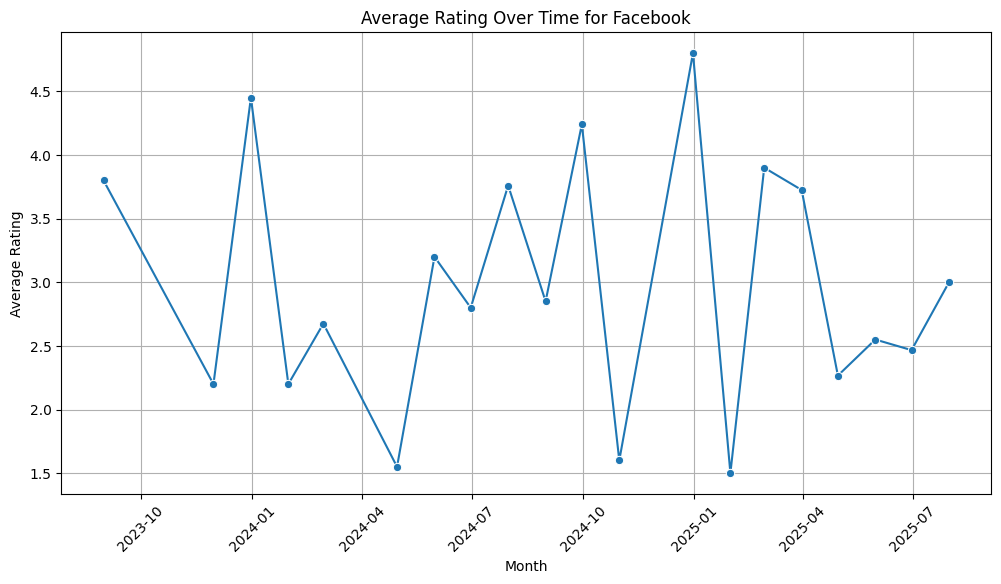

In [10]:
plot_average_rating('Facebook')

## Popular Apps In Countries

In [11]:
df['user_country'].unique()

array(['China', 'Germany', 'Nigeria', 'India', 'South Korea', 'Spain',
       'Australia', 'Malaysia', 'Vietnam', 'Pakistan', 'United Kingdom',
       'Japan', 'Brazil', 'Italy', 'Unknown', 'Turkey', 'Thailand',
       'France', 'Mexico', 'United States', 'Bangladesh', 'Canada',
       'Philippines', 'Indonesia', 'Russia'], dtype=object)

In [12]:
def plot_top_apps_by_country(country):
    country_data = df[df['user_country'] == country]
    top_apps = country_data.groupby('app_name')['rating'].mean().sort_values(ascending=False).head(10)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_apps.values, y=top_apps.index, palette='viridis')
    plt.title(f'Top 10 Apps by Average Rating in {country}')
    plt.xlabel('Average Rating')
    plt.ylabel('App Name')
    plt.grid()
    plt.show()

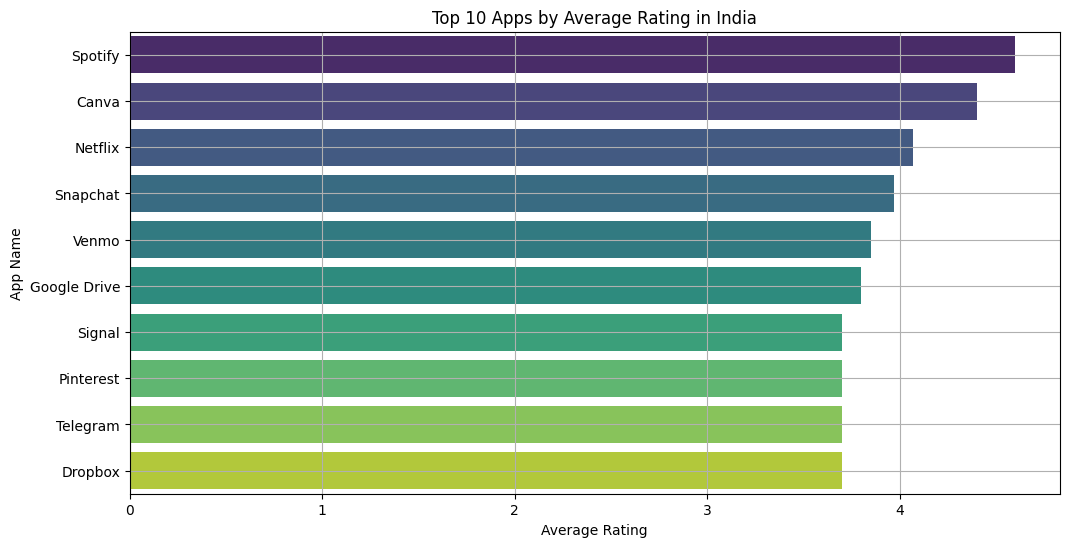

In [13]:
plot_top_apps_by_country('India')

## Relationship of Ratings with Helpful Votes

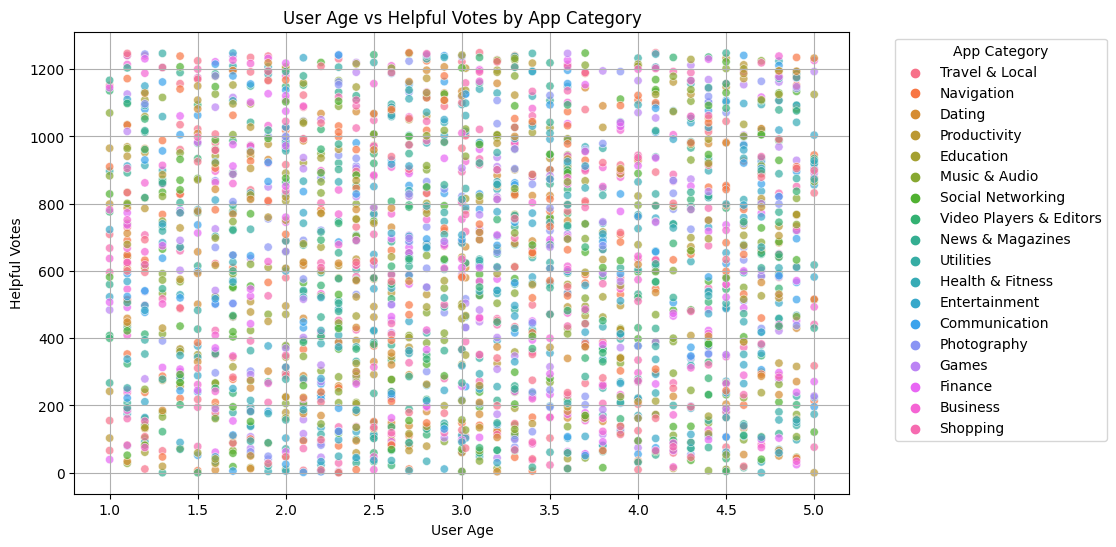

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='rating', y='num_helpful_votes', hue='app_category', alpha=0.7)
plt.title('User Age vs Helpful Votes by App Category')
plt.xlabel('User Age')
plt.ylabel('Helpful Votes')
plt.legend(title='App Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

## Device Used By Genders

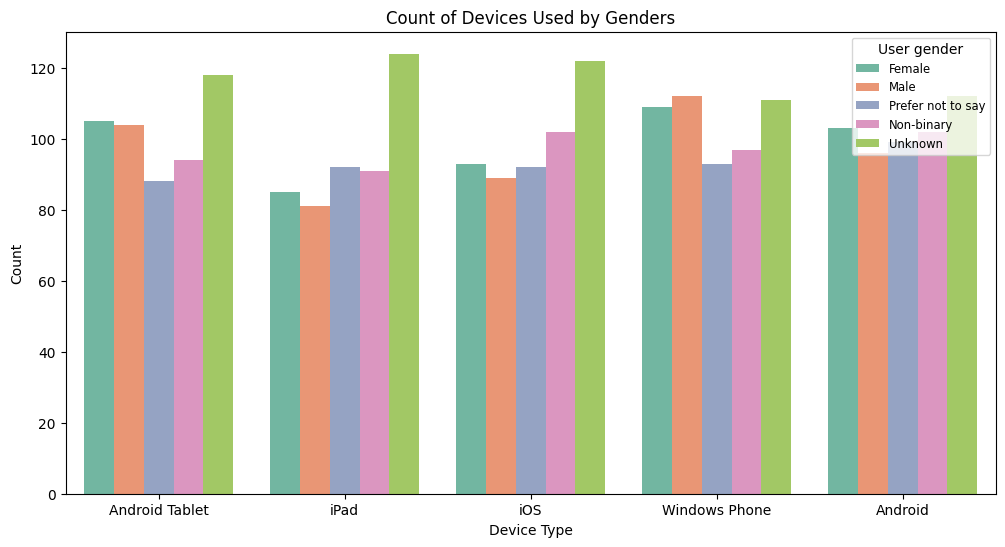

In [15]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='device_type', hue='user_gender', palette='Set2')
plt.title('Count of Devices Used by Genders')
plt.xlabel('Device Type')
plt.ylabel('Count')
plt.legend(title='User gender', loc='upper right', fontsize='small')
plt.show()

## Top 5 Mostly Used Apps In Each Device

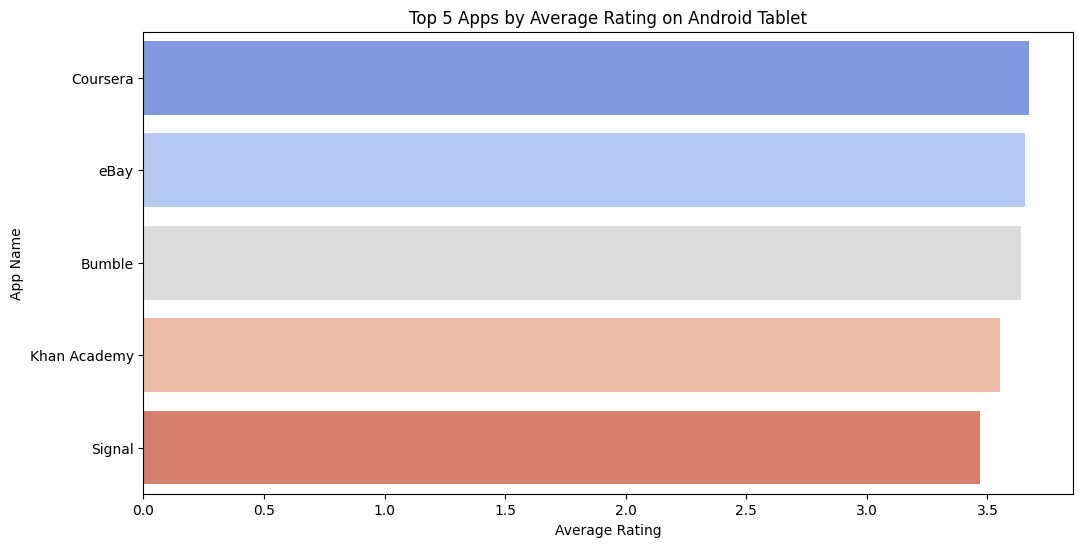

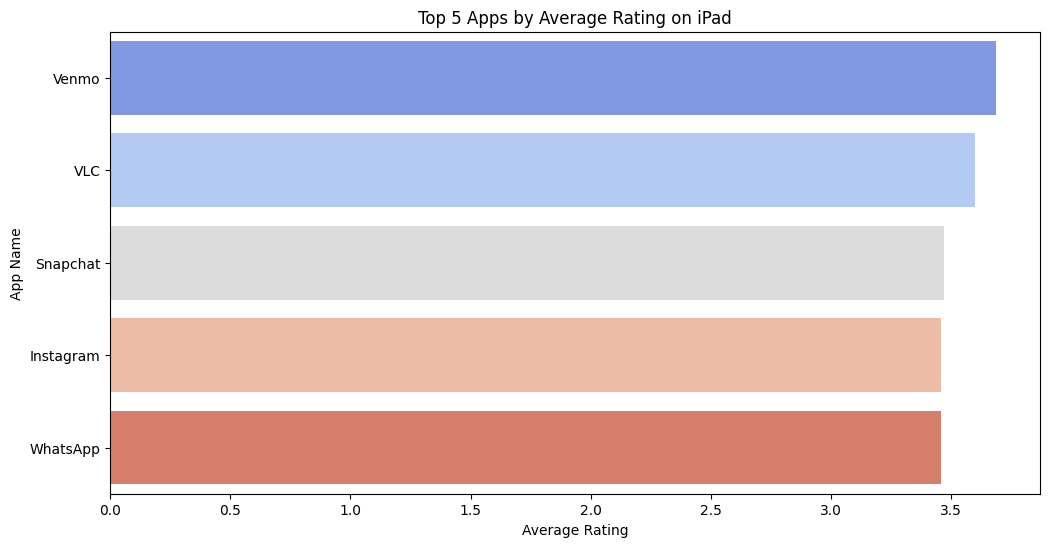

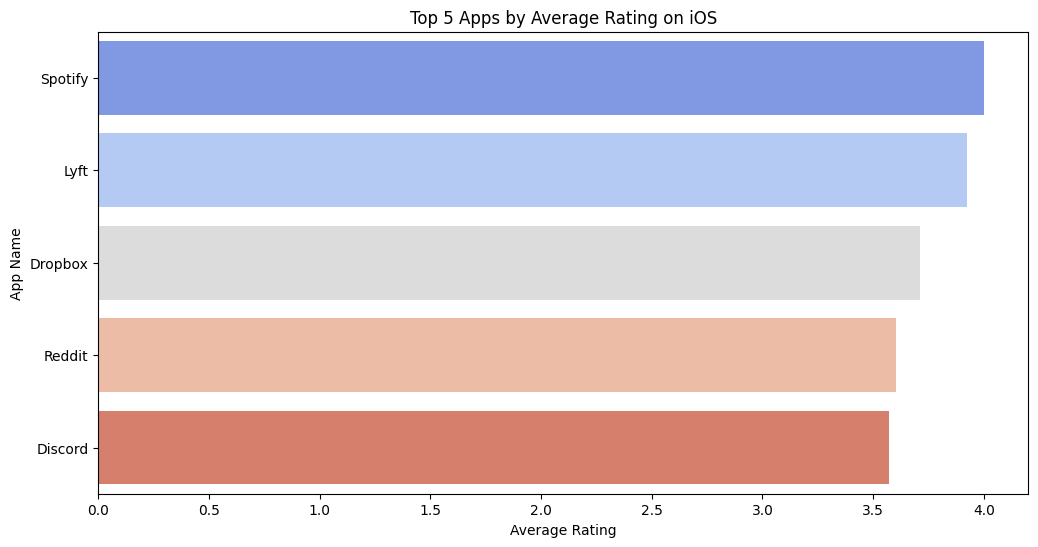

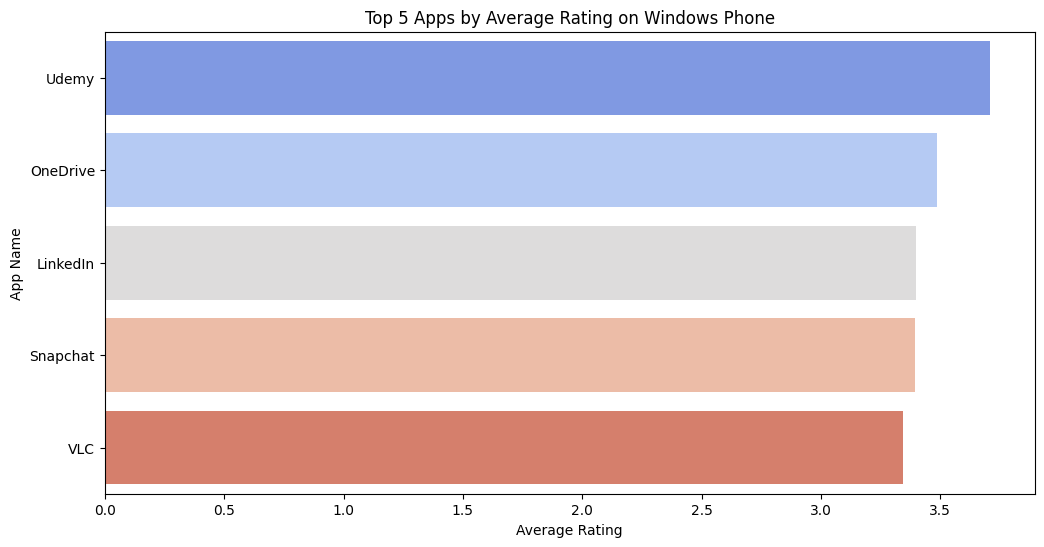

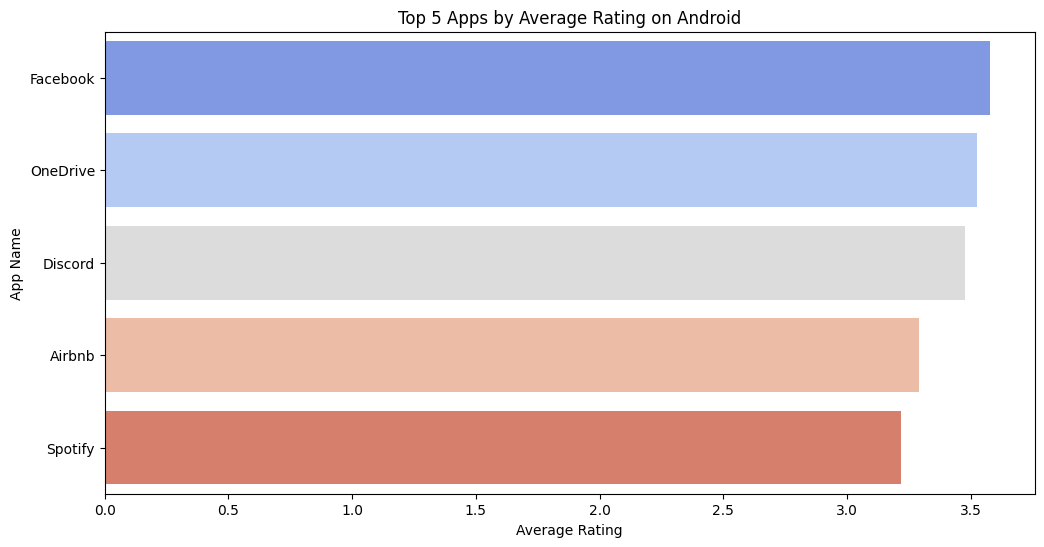

In [16]:
device_types = df['device_type'].unique()
for device in device_types:
    device_data = df[df['device_type'] == device]
    top_apps = device_data.groupby('app_name')['rating'].mean().sort_values(ascending=False).head(5)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_apps.values, y=top_apps.index, palette='coolwarm')
    plt.title(f'Top 5 Apps by Average Rating on {device}')
    plt.xlabel('Average Rating')
    plt.ylabel('App Name')
    plt.show()

## Count of Categories

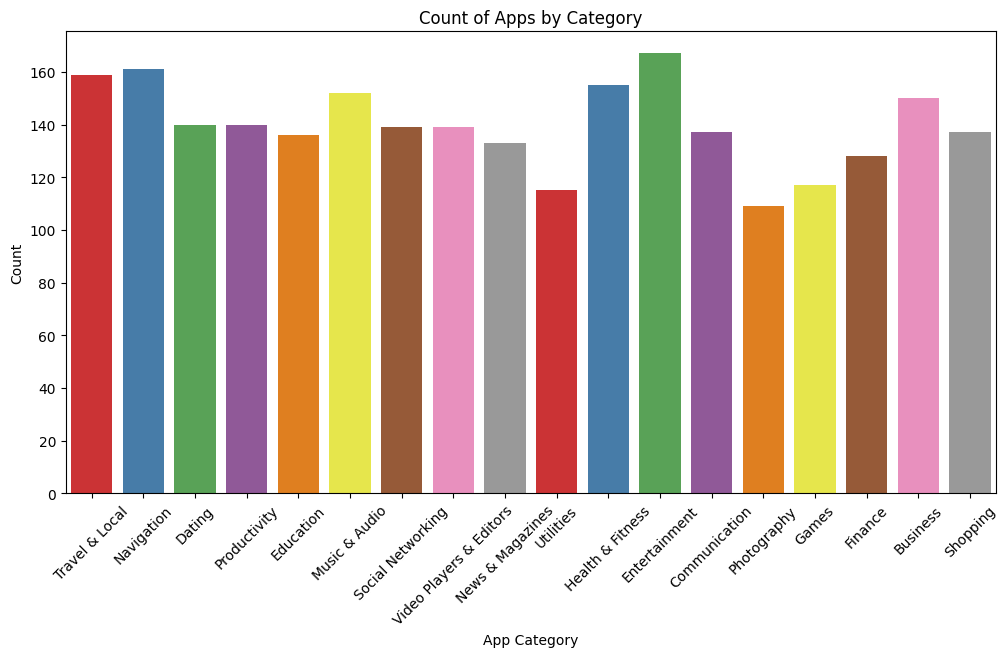

In [17]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='app_category', palette='Set1')
plt.title('Count of Apps by Category')
plt.xlabel('App Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Average Ratings Given to App Category

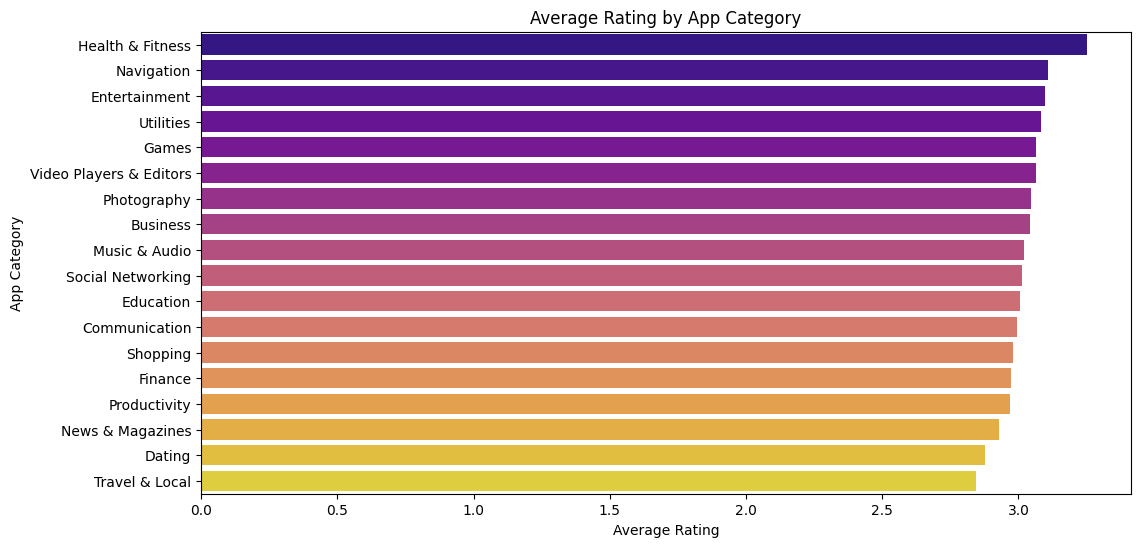

In [18]:
plt.figure(figsize=(12, 6))
avg_rating_by_category = df.groupby('app_category')['rating'].mean().sort_values(ascending=False)
sns.barplot(x=avg_rating_by_category.values, y=avg_rating_by_category.index, palette='plasma')
plt.title('Average Rating by App Category')
plt.xlabel('Average Rating')
plt.ylabel('App Category')
plt.show()

## Age Distribution of Each App

In [19]:
def plot_age_distribution(app_name):
    app_data = df[df['app_name'] == app_name]
    
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=app_data, x='app_name', y='user_age', palette='pastel')
    plt.title(f'Age Distribution of Users for {app_name}')
    plt.ylabel('Age')
    plt.grid()
    plt.xlabel('App Name')
    plt.show()

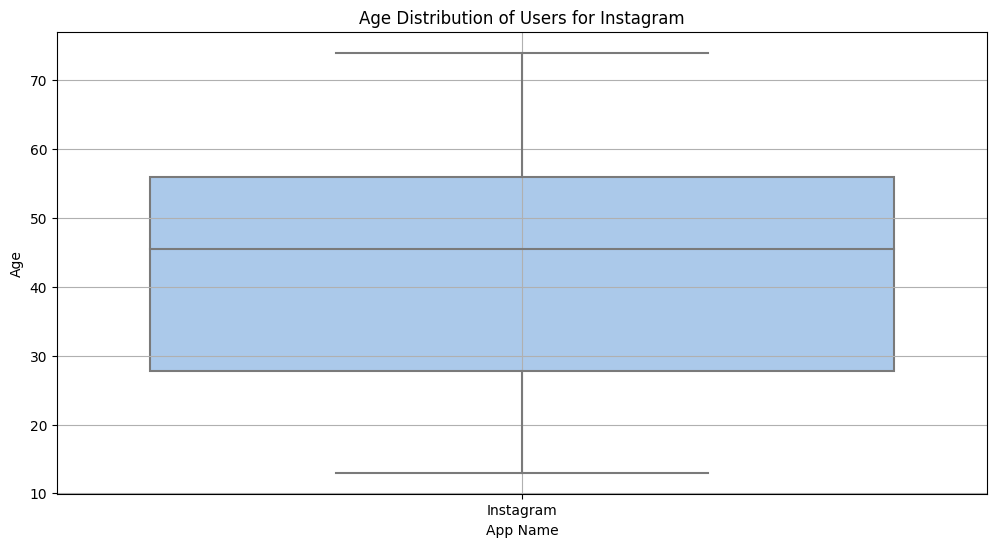

In [20]:
plot_age_distribution('Instagram')

# PLease Upvote 💖